## Observations and Insights 

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID',how='outer')
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
len(merge_df.groupby('Mouse ID').count())


249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df.groupby(['Mouse ID','Timepoint'])
duplicates = duplicates['Mouse ID'].count()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.loc[(duplicates["Mouse ID"]>1)]
                            
duplicates

Mouse ID
Mouse ID Timepoint          
g989     0                 2
         5                 2
         10                2
         15                2
         20                2

In [23]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_data = merge_df.loc[(merge_df['Mouse ID']=='g989')]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[(merge_df['Mouse ID']!='g989')]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
len(clean_df.groupby('Mouse ID').count())

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_regimen_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].reset_index()
by_regimen_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].reset_index()
by_regimen_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].reset_index()
by_regimen_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].reset_index()
by_regimen_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].reset_index()

by_regimen = pd.merge(by_regimen_mean, by_regimen_median, on='Drug Regimen', suffixes = ("_Mean","_Median"))
by_regimen = pd.merge(by_regimen, by_regimen_var, on='Drug Regimen', suffixes = (None,"_Var"))
by_regimen = pd.merge(by_regimen, by_regimen_std, on='Drug Regimen', suffixes = (None,"_STD"))
by_regimen = pd.merge(by_regimen, by_regimen_sem, on='Drug Regimen', suffixes = (None,"_SEM"))

by_regimen = pd.DataFrame(by_regimen)
by_regimen = by_regimen.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_Variance)'})

                

# This method is the most straighforward, creating multiple series and putting them all together at the end.

by_regimen

,Drug Regimen,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Variance),Tumor Volume (mm3)_STD,Tumor Volume (mm3)_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

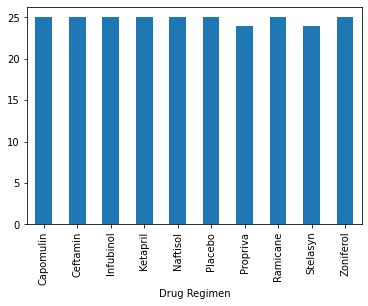

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
clean_df_plot = mouse_metadata.loc[(mouse_metadata['Mouse ID']!='g989')]
clean_df_plot = clean_df_plot.groupby('Drug Regimen').count()['Mouse ID']
clean_df_plot.plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

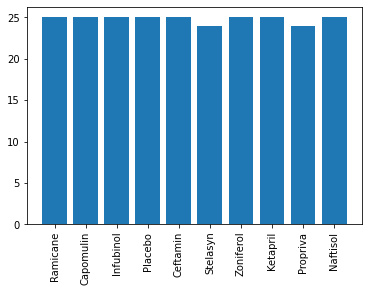

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
labels = clean_df['Drug Regimen'].unique()
mouse_count = []
for ea in labels:
    mouse_count.append(len(mouse_metadata.loc[(mouse_metadata['Drug Regimen']==ea) & (mouse_metadata['Mouse ID']!='g989')]))  
x_axis = np.arange(0,len(labels))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.bar(x_axis, mouse_count)
plt.xticks(tick_locations, labels)
plt.xticks(rotation = 90)
    


<AxesSubplot:ylabel='Mouse ID'>

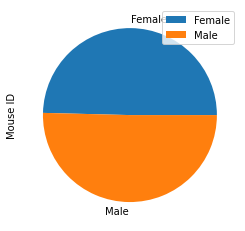

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_metadata.loc[(mouse_metadata['Mouse ID']!='g989')]
mouse_sex = mouse_sex.groupby('Sex').count()['Mouse ID']
mouse_sex = pd.DataFrame(mouse_sex)
mouse_sex.plot.pie(y='Mouse ID')


([<matplotlib.patches.Wedge at 0x16fd54c25e0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

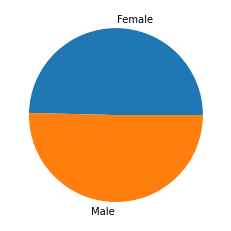

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex['Mouse ID'],labels = ['Female','Male'])



## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = study_results.loc[(study_results['Mouse ID']!='g989')].groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_at_last = pd.merge(clean_df,greatest_tp,on='Mouse ID',suffixes=(None,"_Last"))
volume_at_last = volume_at_last.loc[(volume_at_last['Timepoint']==volume_at_last['Timepoint_Last'])]
volume_at_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint_Last
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


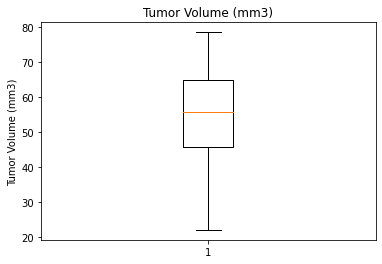

The lower quartile of Tumor Volume is: 45.87586684749999
The upper quartile of Tumor Volume is: 65.05362410500001
The interquartile range of Tumor Volume is: 19.17775725750002
The the median of Tumor Volume is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
labels = clean_df['Drug Regimen'].unique()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#Get all tumor volumes to a list
for ea in volume_at_last["Tumor Volume (mm3)"]:
    tumor_vol.append(ea)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol.sort()

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()


quartiles = pd.DataFrame(tumor_vol).quantile([.25,.5,.75])
lowerq = quartiles[0][0.25]
upperq = quartiles[0][0.75]
iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
ax1.boxplot(tumor_vol)
    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0][0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

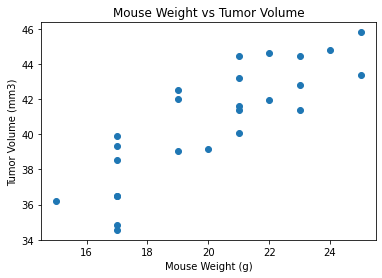

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_df_scatter = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')]
capo_df_scatter = capo_df_scatter.groupby('Mouse ID').mean()
x_axis = capo_df_scatter[['Weight (g)']]
vals = capo_df_scatter[['Tumor Volume (mm3)']]
plt.title('Mouse Weight vs Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.scatter(x_axis,vals)


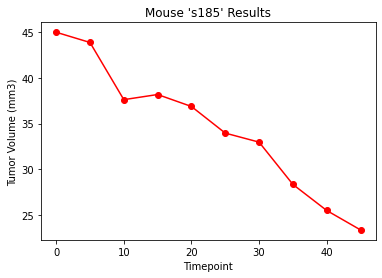

In [133]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = clean_df.loc[(clean_df['Drug Regimen']=="Capomulin") & (clean_df['Mouse ID']=='s185')]

x_axis = capo_df[['Timepoint','Tumor Volume (mm3)']]
x_axis = capo_df['Timepoint']
vals = capo_df[['Tumor Volume (mm3)']]

plt.plot(x_axis, vals, marker='o',color='red')
plt.title("Mouse 's185' Results")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()


## Correlation and Regression

In [151]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capo_df_scatter.iloc[:,1]

tumor_vol = capo_df_scatter.iloc[:,3]

correlation = st.pearsonr(mouse_weight,tumor_vol)
print(f"The correlation coefficient is {correlation[0]}")




The correlation coefficient is 0.8419363424694716


In [160]:
x_values = capo_df_scatter['Weight (g)']
y_values = capo_df_scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq


'y = 0.95x + 21.55'